In [1]:
import sqlite3
import matplotlib.pyplot as plt

def read_gps_data_from_db(filename):
    connection = sqlite3.connect(filename)
    cursor = connection.cursor()
    
    cursor.execute("SELECT * FROM location_table WHERE timestamp < 1612772640")
    
    return list(cursor)

def read_gps_data_from_db_2(filename):
    connection = sqlite3.connect(filename)
    cursor = connection.cursor()
    
    cursor.execute("SELECT * FROM location_table WHERE timestamp BETWEEN 1611846940 AND 1611847200")
    
    return list(cursor)
    
data5s5m = read_gps_data_from_db("5s5m")
data5s0m = read_gps_data_from_db("still_5s")
data15s0m = read_gps_data_from_db("still_15s")

data15m0s_2_good = read_gps_data_from_db_2("15m0s_2_good")
data15m0s_2_bad = read_gps_data_from_db_2("15m0s_2_bad")


In [2]:
def show_points(ax, points, color):
    lats = [p[1] for p in points]
    lons = [p[2] for p in points]

    ax.scatter(lons, lats, zorder=1, c=color, s=10)


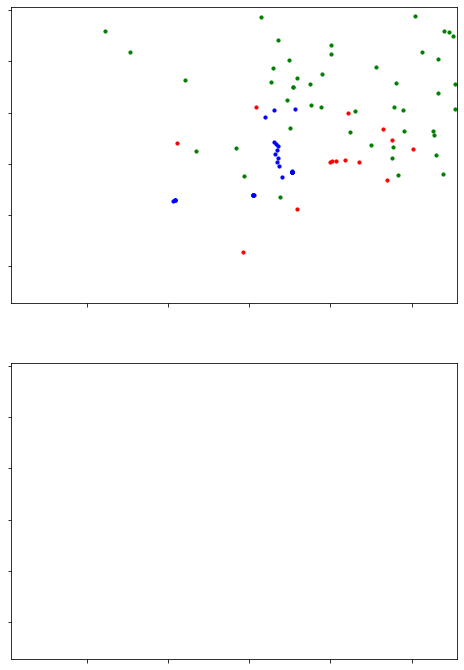

In [3]:
_, ax = plt.subplots(2, figsize = (8,12))

show_points(ax[0], data5s0m, 'blue')
show_points(ax[0], data15s0m, 'red')
show_points(ax[0], data5s5m, 'green')

BORDER = 0.0002

lats = [p[1] for p in data5s0m]
lons = [p[2] for p in data5s0m]

ax[0].set_xlim(min(lons) - BORDER, max(lons) + BORDER)
ax[0].set_ylim(min(lats) - BORDER, max(lats) + BORDER)
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])

show_points(ax[1], data15m0s_2_bad, 'red')
show_points(ax[1], data15m0s_2_good, 'blue')

ax[1].set_xlim(min(lons) - BORDER, max(lons) + BORDER)
ax[1].set_ylim(min(lats) - BORDER, max(lats) + BORDER)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])

pass

62

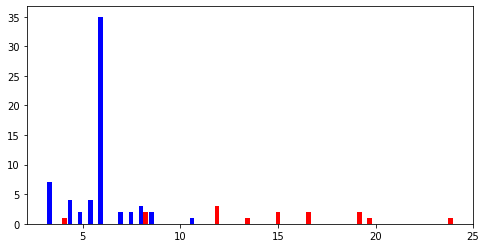

In [8]:
_, ax = plt.subplots(1, figsize = (8,4))

acc5m0s = [p[3] for p in data5s0m]
# acc5m5s = [p[3] for p in data5s5m]
acc15m0s = [p[3] for p in data15s0m]

ax.hist([acc5m0s, acc15m0s], color=['blue', 'red'], bins=40,rwidth=0.9)

len(acc5m0s)